In [ ]:
import numpy as np
import matplotlib.pyplot as plt

$$N\mathcal{ \in \mathbb{N}}$$
$$\vec{t}=
\begin{pmatrix}
t_0 , t_1 , t_2 \text{ . . . . } t_N
\end{pmatrix}$$
$$\Delta_t = t_1 - t_0 = \frac{1}{N-1}$$

In [ ]:
N=2000
a=0
b=1
t = np.linspace(a, b, N)

$${\text{f(t)}=sin(150t) + sin(347t) + sin(745t)}$$

In [ ]:
def f(t):
    
    s=0
    sinuses=[150,347,745]
    for i in range(len(sinuses)):
        s += np.sin(sinuses[i] * 2 * np.pi * t)
    return s

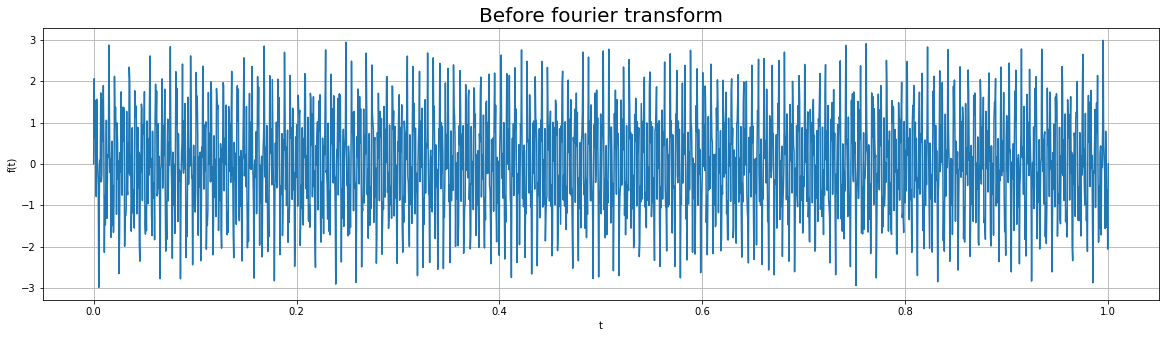

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(t, f(t), label = r'$y=f(x)$')
ax.set_title(f"Before fourier transform", fontsize = 20)
ax.set_ylabel("f(t)")
ax.set_xlabel("t")
ax.grid(True)

$$
\vec{n}=
\begin{pmatrix}
0 , 1 , 2 ,\ldots, N
\end{pmatrix}_{1\times{N}} \qquad
\vec{k}=
\begin{pmatrix}0 \\ 1 \\ 2 \\\vdots\\ N \end{pmatrix}_{N\times{1}}
$$



In [ ]:
n = np.arange(N) 
k = n.reshape((N, 1))

$$
\bar{M}=
\vec{n}\cdot{\vec{k}}=
\begin{pmatrix}
0 , 1 , 2 ,\ldots, N
\end{pmatrix}\cdot{ \begin{pmatrix}0 \\ 1 \\ 2 \\\vdots\\ N \end{pmatrix}}=
\begin{pmatrix}
n_1k_1 & n_1k_2 & \cdots & n_1k_N
 \\ n_2k_1 & n_2k_2 & \cdots & n_2k_N
 \\ \vdots & \vdots & \ddots & \vdots
 \\ n_Nk_1 & n_Nk_2 & \cdots & n_Nk_N
\end{pmatrix}_{N\times{N}}
$$




In [ ]:
M=n*k

this is the taylor series $$e^z = \sum_{n=0}^{∞} \frac{z^n}{n!}$$
$$\Downarrow$$
$$e^{A}= \sum_{n=0}^{∞} \frac{A^n}{n!} 
\Rightarrow
e^{At}= \sum_{n=0}^{∞} \frac{t^nA^n}{n!}=e^{At}= \sum_{n=0}^{∞} \frac{(tA)^n}{n!} $$
$$\Downarrow$$






$$
\bar{A}=
{-\frac{j2\pi}{N}\bar{M}}=
\begin{pmatrix}
-\frac{j2\pi}{N}n_1k_1 & -\frac{j2\pi}{N}n_1k_2 & \cdots & -\frac{j2\pi}{N}n_1k_N
 \\ -\frac{j2\pi}{N}n_2k_1 & -\frac{j2\pi}{N}n_2k_2 & \cdots & -\frac{j2\pi}{N}n_2k_N
 \\ \vdots & \vdots & \ddots & \vdots
 \\ -\frac{j2\pi}{N}n_Nk_1 & -\frac{j2\pi}{N}n_Nk_2 & \cdots & -\frac{j2\pi}{N}n_Nk_N
\end{pmatrix}_{N\times{N}}
$$
$$\Downarrow$$


$$e^{A}=\sum_{n=0}^{∞} \frac{-\frac{j2\pi}{N}^nM^n}{n!}= \sum_{n=0}^{∞} \frac{(-\frac{j2\pi}{N}M)^n}{n!}= \sum_{n=0}^{∞} \frac{A^n}{n!} $$

In [ ]:
A=-2j*np.pi * M / N

$$\mathcal{F(f)}=e^A\cdot{\text{f(t)}}$$

In [ ]:
#Compute the discrete Fourier Transform of the signal f(t)
dft = np.exp(A) @ f(t)

$$\Delta_t=t_1-t_0=\frac{1}{N-1}$$
$$\mathcal{\vec{f}} = \frac{\vec{t}}{\Delta_t}=\begin{pmatrix}
f_0 , f_1 , f_2 \text{ . . . . } f_N
\end{pmatrix} $$


In [ ]:
delta_t = t[1] - t[0]
freq=t/delta_t 

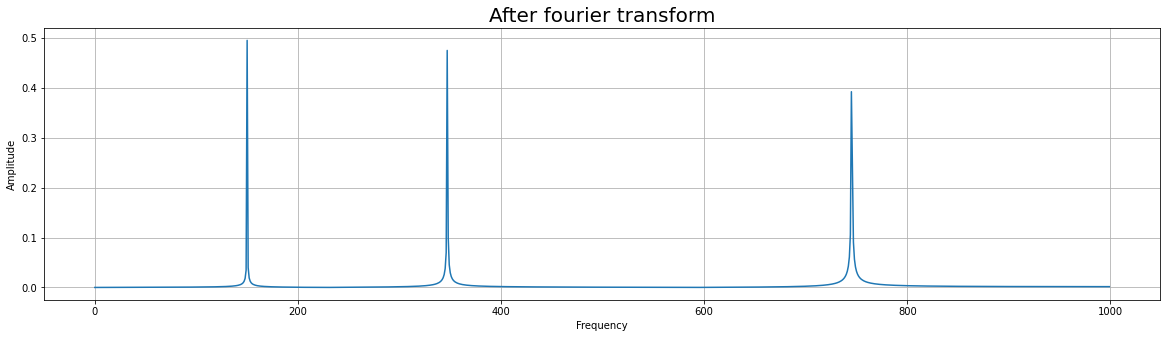

In [ ]:
fig = plt.figure(figsize=(20,5))
ax2 = fig.add_subplot(1,1,1)
ax2.plot(freq[:N//2], np.abs(dft)[:N//2] * 1/N, label = r'$f=fft(s)$')
ax2.set_title(f"After fourier transform", fontsize = 20)
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Frequency")
ax2.grid(True)
plt.show()

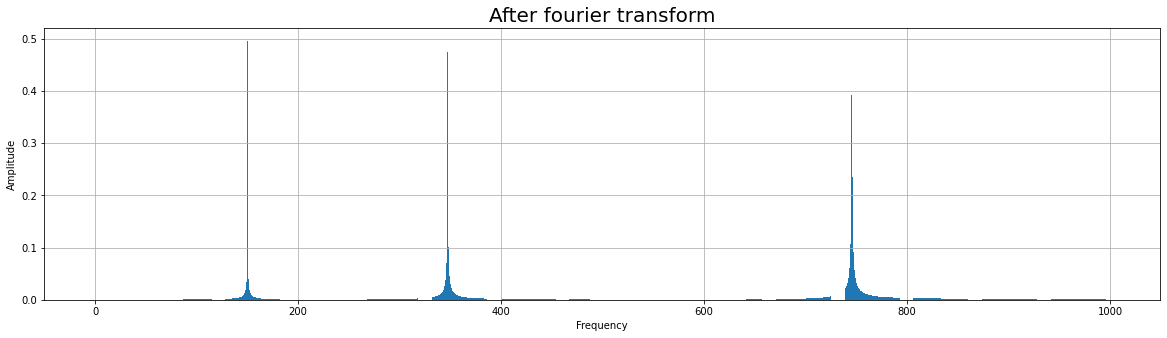

In [ ]:
fig = plt.figure(figsize=(20,5))
ax2 = fig.add_subplot(1,1,1)
ax2.bar(freq[:N//2], np.abs(dft)[:N//2] * 1/N, label = r'$f=fft(s)$')
ax2.set_title(f"After fourier transform", fontsize = 20)
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Frequency")
ax2.grid(True)
plt.show()

$$\mathcal{F^{-1}(f)}=\frac{1}{\sqrt{N}} \cdot\mathcal{(e^A \cdot{ F(f)})}$$

In [395]:
idft =np.exp(A) @ dft * 1/np.sqrt(N)

$$\mathcal{\vec{f}} = \frac{\vec{t}}{\Delta_t}=\begin{pmatrix}
f_0 , f_1 , f_2 \text{ . . . . } f_N
\end{pmatrix} $$
$$\Downarrow$$
$$\mathcal{\vec{f}⋅{\Delta_t}} = \vec{t}$$



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


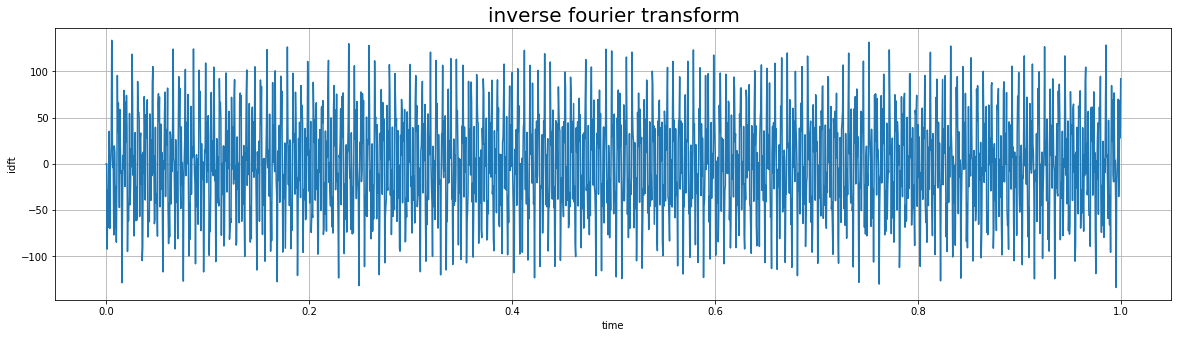

In [397]:
fig = plt.figure(figsize=(20,5))
ax2 = fig.add_subplot(1,1,1)
ax2.plot(freq*delta_t, idft, label = r'$f=fft(s)$')
ax2.set_title(f"inverse fourier transform", fontsize = 20)
ax2.set_ylabel("idft")
ax2.set_xlabel("time")
ax2.grid(True)
plt.show()